In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('assets/train.csv')
df_test = pd.read_csv('assets/test.csv')

In [3]:
print(df_train.shape)
print(df_test.shape)

(165034, 14)
(110023, 13)


In [4]:
df_train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df_train.duplicated().sum()

0

In [7]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [9]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [10]:
train = df_train.drop(columns =['id', 'CustomerId', 'Surname'], axis=1)
test = df_test.drop(columns=['id', 'CustomerId', 'Surname'], axis=1)

In [11]:
train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [12]:
test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [13]:
features = train.drop(columns=['Exited'])
targets = train['Exited']

In [15]:
cat_features = features.select_dtypes(include=['object']).columns
con_features = features.drop(cat_features, axis=1).columns

In [16]:
cat_features

Index(['Geography', 'Gender'], dtype='object')

In [17]:
con_features

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [21]:
from scipy import stats

In [22]:
z_score = np.abs(stats.zscore(train[con_features]))

In [23]:
threshold =3

outlier = np.where(z_score>threshold)
print(len(outlier[0]))

2595


In [24]:
X = features[(z_score<threshold).all(axis=1)].reset_index(drop=True)
y = targets[(z_score<threshold).all(axis=1)].reset_index(drop=True)

In [25]:
print(X.shape)
print(test.shape)
print(y.shape)

(162449, 10)
(110023, 10)
(162449,)


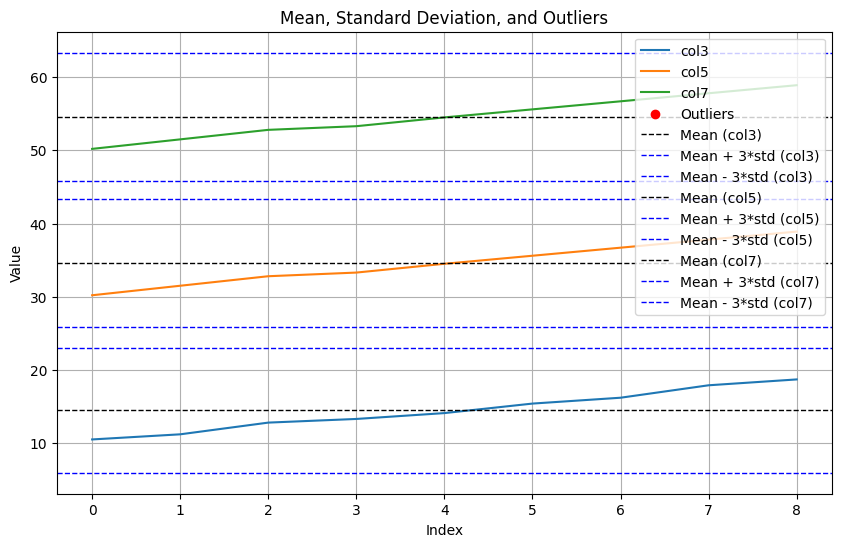

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Given data
data = {
    'col1': [80.103340, 8.867205, 2.806159, 62817.663278, 0.547154, 0.430707, 0.499997, 50292.865585, 0.408443],
    'col2': [1.2, 2.5, 3.8, 4.3, 5.1, 6.4, 7.2, 8.9, 9.7],
    'col3': [10.5, 11.2, 12.8, 13.3, 14.1, 15.4, 16.2, 17.9, 18.7],
    'col4': [20.1, 21.5, 22.8, 23.3, 24.5, 25.6, 26.7, 27.8, 28.9],
    'col5': [30.2, 31.5, 32.8, 33.3, 34.5, 35.6, 36.7, 37.8, 38.9],
    'col6': [40.2, 41.5, 42.8, 43.3, 44.5, 45.6, 46.7, 47.8, 48.9],
    'col7': [50.2, 51.5, 52.8, 53.3, 54.5, 55.6, 56.7, 57.8, 58.9],
    # Add more columns as needed
}

# Create a DataFrame
df = pd.DataFrame(data)

# Select columns 3, 5, and 7
selected_columns = ['col3', 'col5', 'col7']

# Calculate mean and standard deviation for selected columns
means = df[selected_columns].mean()
stds = df[selected_columns].std()

# Calculate z-scores with absolute values for selected columns
z_scores_abs = np.abs((df[selected_columns] - means) / stds)

# Identify rows with potential outliers based on z-scores
outlier_rows = z_scores_abs.max(axis=1) > 3

# Plot mean and standard deviation as a line plot
plt.figure(figsize=(10, 6))
for col in selected_columns:
    plt.plot(df.index, df[col], label=f'{col}')

# Plot outliers as scatter points
outlier_indices = df.index[outlier_rows]
outlier_values = df[selected_columns].values[outlier_rows]
plt.scatter(outlier_indices, outlier_values, color='red', label='Outliers')

# Add mean and standard deviation lines
for col, mean, std in zip(selected_columns, means, stds):
    plt.axhline(y=mean, color='black', linestyle='--', linewidth=1, label=f'Mean ({col})')
    plt.axhline(y=mean + 3 * std, color='blue', linestyle='--', linewidth=1, label=f'Mean + 3*std ({col})')
    plt.axhline(y=mean - 3 * std, color='blue', linestyle='--', linewidth=1, label=f'Mean - 3*std ({col})')

# Set plot labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Mean, Standard Deviation, and Outliers')
plt.legend()
plt.grid(True)
plt.show()
